<a href="https://colab.research.google.com/github/GitMarco27/TMML/blob/main/Notebooks/010_Lambda_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Minutes Machine Learning
## Episode 10: Lambda Layer

#### Marco Sanguineti, 2021
---
Welcome to 3 minutes Machine Learning!

In [2]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.5.0


In [4]:
import os
def loadThumb(path):
  # Let's import this video thumbnail!
  if os.path.exists(path):
    myThumb = plt.imread(path)
    fig, ax = plt.subplots(figsize=(15, 10))
    plt.axis('off')
    ax.imshow(myThumb)
    plt.show()

loadThumb('/tmp/yt_thumb_010.png')


#### Video Topics
> 1. Load the fashion MNIST dataset
> 2. Create a model with the keras API with a lambda layer for normalization
> 3. Train the model and check the results
> 4. See you on next video! 

# Load the dataset
___

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = list(set(list(train_labels)))
class_names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
def plot_image(image):
  plt.figure()
  plt.imshow(image)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def plot_images(images):
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[train_labels[i]])
  plt.show()

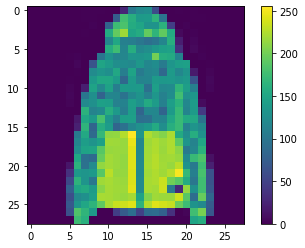

In [8]:
plot_image(train_images[22])

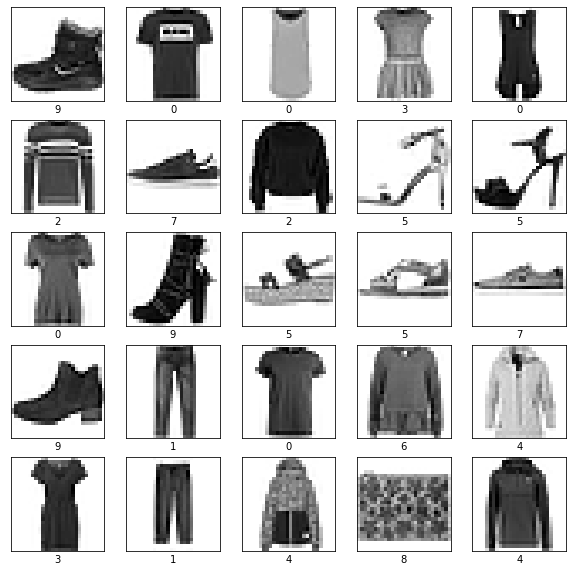

In [9]:
plot_images(train_images)

# Create the model
___

In [10]:
from tensorflow.keras.layers import Dense, Input, Lambda, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Layer

In [11]:
print(f'Images Shape: {train_images[0].shape}')
print(f'Num. of classes: {len(set(train_labels))}')

Images Shape: (28, 28)
Num. of classes: 10


In [12]:
input_data = Input(shape=(train_images[0].shape), name='Input')
normalization = Lambda(lambda x: x / 255.0)(input_data)
flatten = Flatten()(normalization)
dense = Dense(64, activation='relu')(flatten)
output = Dense(len(set(train_labels)), name='output')(dense)
model = Model(input_data, output)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
lambda (Lambda)              (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


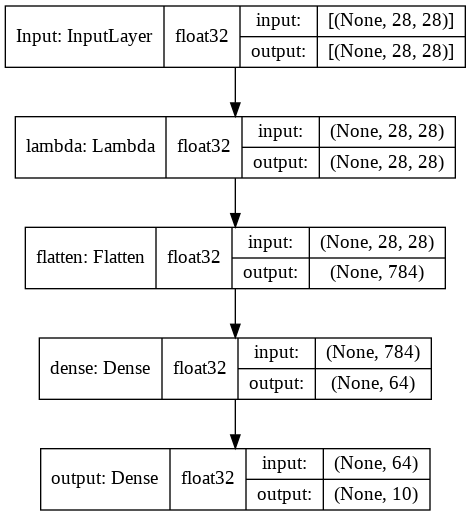

In [13]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

# Train and check the results
___

In [14]:
model.layers

In [15]:
history = model.fit(
    train_images,
    train_labels,
    batch_size = 256,
    epochs=10,
    validation_data=(test_images,
                     test_labels))

Epoch 1/10
235/235 [==============================] - 4s 4ms/step - loss: 0.6785 - accuracy: 0.7751 - val_loss: 0.5127 - val_accuracy: 0.8223
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.4489 - accuracy: 0.8452 - val_loss: 0.4601 - val_accuracy: 0.8377
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8587 - val_loss: 0.4297 - val_accuracy: 0.8462
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3823 - accuracy: 0.8660 - val_loss: 0.4144 - val_accuracy: 0.8520
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3654 - accuracy: 0.8708 - val_loss: 0.4087 - val_accuracy: 0.8535
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3537 - accuracy: 0.8745 - val_loss: 0.3825 - val_accuracy: 0.8610
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3413 - accuracy: 0.8780 - val_loss: 0.3845 - val_accuracy: 0.8627
Epoch 

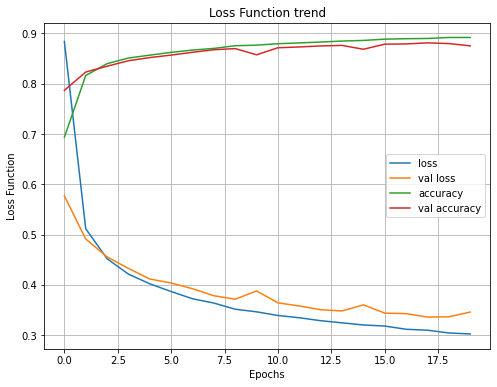

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(loss, label='loss')
plt.plot(val_loss, label = 'val loss')
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.grid('both')
plt.xlabel('Epochs')
plt.ylabel('Loss Function')
plt.title('Loss Function trend')
plt.legend()
plt.show()

In [23]:
input_data = Input(shape=(*train_images[0].shape,), name='Input')
normalization = Lambda(lambda x: x / 255.0)(input_data)
expand = Lambda(lambda x: tf.expand_dims(x, -1))(normalization)
conv_1 = Conv2D(16, (3, 3), activation='relu')(expand)
max_pool_1 = MaxPool2D(2, 2)(conv_1)
conv_2 = Conv2D(16, (3, 3), activation='relu')(max_pool_1)
max_pool_2 = MaxPool2D(2, 2)(conv_2)
flatten = Flatten()(max_pool_2)
output = Dense(len(set(train_labels)), name='output')(flatten)
model = Model(input_data, output)
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28)]          0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 28, 28)            0         
_________________________________________________________________
lambda_4 (Lambda)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0   

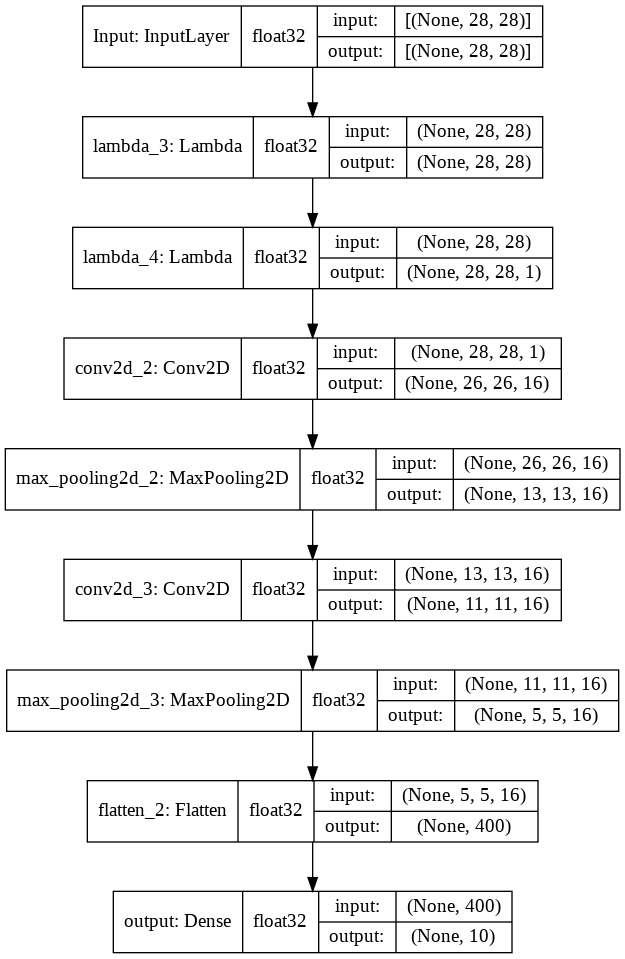

In [24]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [25]:
history = model.fit(
    train_images,
    train_labels,
    batch_size = 256,
    epochs=20,
    validation_data=(test_images,
                     test_labels))

Epoch 1/20
235/235 [==============================] - 2s 8ms/step - loss: 0.8840 - accuracy: 0.6936 - val_loss: 0.5769 - val_accuracy: 0.7869
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.5116 - accuracy: 0.8164 - val_loss: 0.4913 - val_accuracy: 0.8233
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.4520 - accuracy: 0.8400 - val_loss: 0.4556 - val_accuracy: 0.8349
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.4214 - accuracy: 0.8512 - val_loss: 0.4328 - val_accuracy: 0.8458
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.4021 - accuracy: 0.8569 - val_loss: 0.4117 - val_accuracy: 0.8521
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.3867 - accuracy: 0.8625 - val_loss: 0.4037 - val_accuracy: 0.8570
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.3725 - accuracy: 0.8670 - val_loss: 0.3924 - val_accuracy: 0.8626
Epoch 

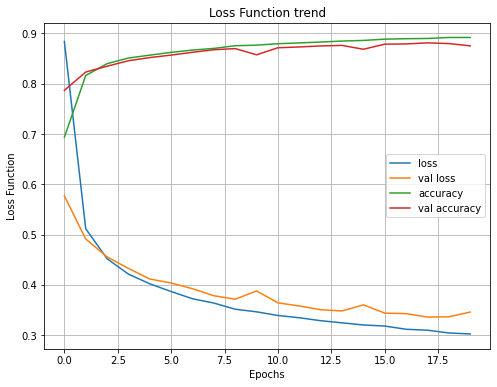

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(loss, label='loss')
plt.plot(val_loss, label = 'val loss')
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.grid('both')
plt.xlabel('Epochs')
plt.ylabel('Loss Function')
plt.title('Loss Function trend')
plt.legend()
plt.show()


# Greetings
---

In [20]:
!pip install art
from art import tprint, aprint
tprint('See you on next videos!')
def subscribe():
  """
  Attractive subscription form
  """
  aprint("giveme", number=5)
  print(f'\n\tLike and subscribe to support this work!\n')
  aprint("giveme", number=5)
subscribe()

     |████████████████████████████████| 571 kB 4.1 MB/s 
 ____                                                                        _            _      _                    _ 
/ ___|   ___   ___   _   _   ___   _   _    ___   _ __    _ __    ___ __  __| |_  __   __(_)  __| |  ___   ___   ___ | |
\___ \  / _ \ / _ \ | | | | / _ \ | | | |  / _ \ | '_ \  | '_ \  / _ \\ \/ /| __| \ \ / /| | / _` | / _ \ / _ \ / __|| |
 ___) ||  __/|  __/ | |_| || (_) || |_| | | (_) || | | | | | | ||  __/ >  < | |_   \ V / | || (_| ||  __/| (_) |\__ \|_|
|____/  \___| \___|  \__, | \___/  \__,_|  \___/ |_| |_| |_| |_| \___|/_/\_\ \__|   \_/  |_| \__,_| \___| \___/ |___/(_)
                     |___/                                                                                              

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 

	Like and subscribe to support this work!

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 
